# Analysis of 'Fuel Consumption' dataset using Polynomial Regression

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("FuelConsumption.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [63]:
df.isnull().any()

MODELYEAR                   False
MAKE                        False
MODEL                       False
VEHICLECLASS                False
ENGINESIZE                  False
CYLINDERS                   False
TRANSMISSION                False
FUELTYPE                    False
FUELCONSUMPTION_CITY        False
FUELCONSUMPTION_HWY         False
FUELCONSUMPTION_COMB        False
FUELCONSUMPTION_COMB_MPG    False
CO2EMISSIONS                False
dtype: bool

<h3>Select the features 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB',  'CO2EMISSIONS'  to  use  for  building  the model.</h3>

In [88]:
features_names = ['ENGINESIZE', 'CYLINDERS', 
'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]

x=df[features_names].iloc[:,:-1]
y=df.iloc[:,-1]


<h3> Plot Emission values with respect to Engine size.</h3>

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


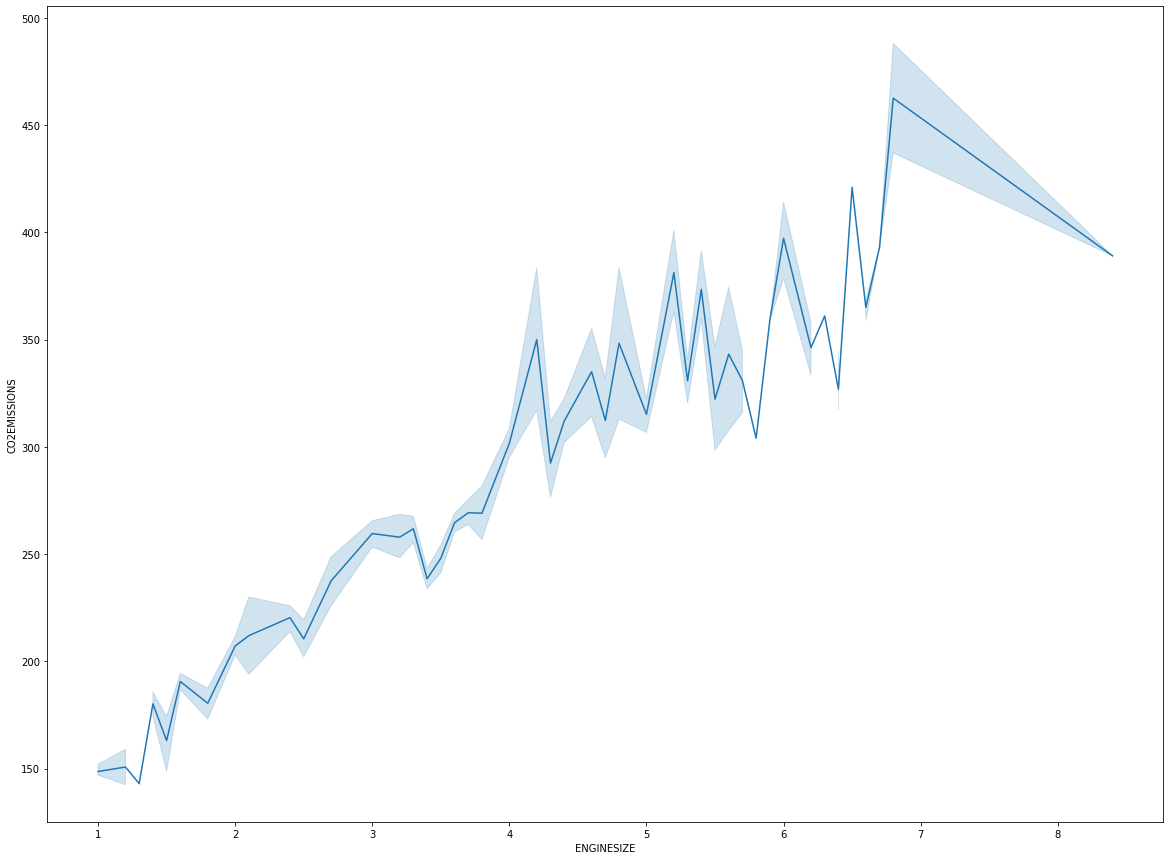

In [87]:
plt.figure(figsize=(20,15))
sns.lineplot(df["ENGINESIZE"],df["CO2EMISSIONS"])
plt.show()

# Since there is variation in Engine Size Line plot is better for visualization

# We can infer that as the Engine Size increases, the CO2 Emissions also increases


<h3>split the data into training and test sets (70:30) to create a model using training set.</h3>

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.3)

<h3>Polynomial regression with the dataset of degree –3, 4 & 5.</h3>

In [68]:
# Applying Linear Regression to the dataset
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)


In [69]:
# Applying the Polynomial Regression to the dataset with degree 3
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 3)
x_train_deg_3 = poly.fit_transform(x_train)

poly.fit(x_train_deg_3, y_train)

lr2 = LinearRegression()
lr2.fit(x_train_deg_3, y_train)

y_pred_deg_3 = lr2.predict(poly.fit_transform(x_test))

In [70]:
# Applying the Polynomial Regression to the dataset with degree 4

poly2 = PolynomialFeatures(degree = 4)
x_train_deg_4 = poly2.fit_transform(x_train)

poly2.fit(x_train_deg_4, y_train)
lr3 = LinearRegression()
lr3.fit(x_train_deg_4, y_train)

y_pred_deg_4 = lr3.predict(poly2.fit_transform(x_test))


In [71]:
# Applying the Polynomial Regression to the dataset with degree 5

poly3 = PolynomialFeatures(degree = 5)
x_train_deg_5 = poly3.fit_transform(x_train)

poly3.fit(x_train_deg_5, y_train)
lr4 = LinearRegression()
lr4.fit(x_train_deg_5, y_train)

y_pred_deg_5 = lr4.predict(poly3.fit_transform(x_test))

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


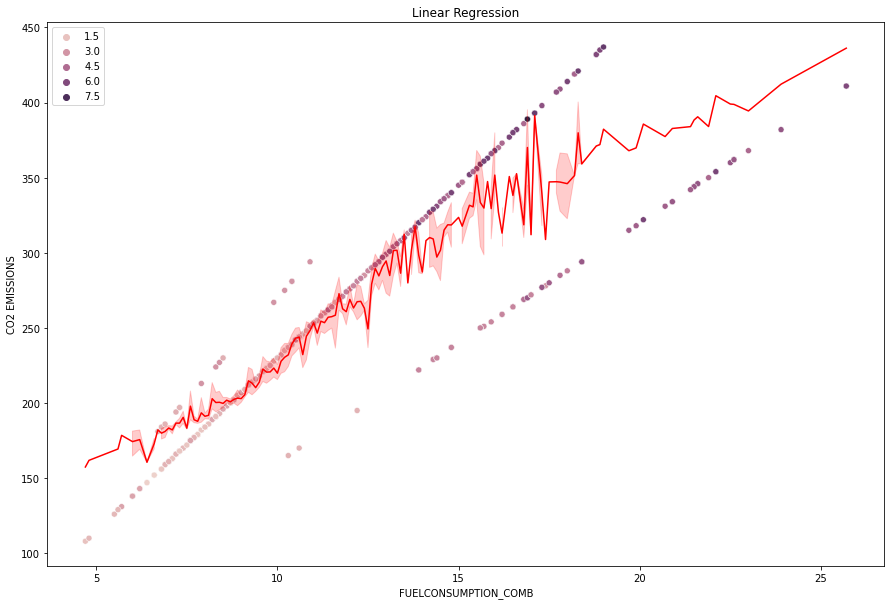

In [76]:
# Visualising the Linear Regression results
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_train["FUELCONSUMPTION_COMB"], y=y_train, hue=x_train["ENGINESIZE"])
y_pred = lr.predict(x_train)
sns.lineplot(x_train["FUELCONSUMPTION_COMB"], y_pred, color = 'red')
plt.title('Linear Regression')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2 EMISSIONS')
plt.show()

<h3>Evaluation of the Regression Model</h3>

In [82]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



In [83]:
# Evaluation for Polynomial Regression with degree 3
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred_deg_3))
print("Residual Sum of Square: ",np.sum(np.square(y_pred_deg_3 - y_test)))
print("R2 Score: ",r2_score(y_test,y_pred_deg_3))



Mean Absolute Error:  10.96958921444935
Residual Sum of Square:  102524.45311720486
R2 Score:  0.9248559119977344


In [74]:
# Evaluation for Polynomial Regression with degree 4
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred_deg_4))
print("Residual Sum of Square: ",np.sum(np.square(y_pred_deg_4 - y_test)))
print("R2 Score: ",r2_score(y_test,y_pred_deg_4))


Mean Absolute Error:  8.932468680206489
Residual Sum of Square:  93150.06425739064
R2 Score:  0.9317267596836425


In [75]:
# Evaluation for Polynomial Regression with degree 5
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred_deg_5))
print("Residual Sum of Square: ",np.sum(np.square(y_pred_deg_5 - y_test)))
print("R2 Score: ",r2_score(y_test,y_pred_deg_5))


Mean Absolute Error:  11.290402458034851
Residual Sum of Square:  1303362.9356781172
R2 Score:  0.04471551752123326


Polynomial Regression model with degree 4 is good compared to others since its mean absolute error and Residual sum of square is less and R2 score is high